In [3]:
import torch 
# 向量类
class Vector:

    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __repr__(self):
        return "("+str(self.x)+","+str(self.y)+")"

	# 判断象限的方法
    @staticmethod
    def judge_quadrant(vec):
        if not isinstance(vec, Vector):
            raise Exception

        if vec.x > 0 and vec.y > 0:
            return 0
        elif vec.x < 0 and vec.y > 0:
            return 1
        elif vec.x < 0 and vec.y < 0:
            return 2
        elif vec.x > 0 and vec.y < 0:
            return 3
        else:
            return 0

        # Toy dataset 准备数据集
import random

data_size = 12800
dataset = []
for i in range(data_size):
    x = random.randint(-1000, 1000)
    y = random.randint(-1000, 1000)
    vec = Vector(x, y)
    dataset.append(vec)
	
x_train = torch.Tensor([[vec.x, vec.y] for vec in dataset]) # 使用pytorch张量的格式
label_set = [Vector.judge_quadrant(vec) for vec in dataset]
y_train = []
for label in label_set:
    if label == 0:
        y_train.append([1, 0, 0, 0])
    elif label == 1:
        y_train.append([0, 1, 0, 0])
    elif label == 2:
        y_train.append([0, 0, 1, 0])
    elif label == 3:
        y_train.append([0, 0, 0, 1])

y_train = torch.Tensor(y_train)

In [4]:
# Toy dataset 准备数据集
import random

data_size = 12800
dataset = []
for i in range(data_size):
    x = random.randint(-1000, 1000)
    y = random.randint(-1000, 1000)
    vec = Vector(x, y)
    dataset.append(vec)
	
x_train = torch.Tensor([[vec.x, vec.y] for vec in dataset]) # 使用pytorch张量的格式
label_set = [Vector.judge_quadrant(vec) for vec in dataset]
y_train = []
for label in label_set:
    if label == 0:
        y_train.append([1, 0, 0, 0])
    elif label == 1:
        y_train.append([0, 1, 0, 0])
    elif label == 2:
        y_train.append([0, 0, 1, 0])
    elif label == 3:
        y_train.append([0, 0, 0, 1])

y_train = torch.Tensor(y_train)


In [5]:
import torch.nn as nn
import torch.nn.functional as F


class ToyNet(nn.Module):

	# 这里定义网络层的信息
    def __init__(self):
        super(ToyNet, self).__init__()

        self.fc1 = nn.Linear(2, 16)
        self.fc2 = nn.Linear(16, 64)
        self.fc3 = nn.Linear(64, 4)

	# 这里构建前向传播计算过程
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [11]:
# 定义损失函数
criterion = nn.MSELoss()
import torch.optim as optim
net = ToyNet()
optimizer = optim.SGD(net.parameters(), lr=0.000001)
epochs = 1000
lloss = []
for epoch in range(epochs):
    #  计算输出
    output = net(x_train)
    #  计算损失值
    loss = criterion(output, y_train)
    #  清零梯度缓存
    optimizer.zero_grad()
    # 计算梯度
    loss.backward()
    #  更新参数
    optimizer.step()
    lloss.append(loss)
    print(epoch, 'times loss:', loss)


0 times loss: tensor(2489.0427, grad_fn=<MseLossBackward0>)
1 times loss: tensor(2050.3796, grad_fn=<MseLossBackward0>)
2 times loss: tensor(1717.7178, grad_fn=<MseLossBackward0>)
3 times loss: tensor(1460.1031, grad_fn=<MseLossBackward0>)
4 times loss: tensor(1257.2673, grad_fn=<MseLossBackward0>)
5 times loss: tensor(1095.3048, grad_fn=<MseLossBackward0>)
6 times loss: tensor(964.0306, grad_fn=<MseLossBackward0>)
7 times loss: tensor(856.1373, grad_fn=<MseLossBackward0>)
8 times loss: tensor(766.3474, grad_fn=<MseLossBackward0>)
9 times loss: tensor(690.7985, grad_fn=<MseLossBackward0>)
10 times loss: tensor(626.6115, grad_fn=<MseLossBackward0>)
11 times loss: tensor(571.5990, grad_fn=<MseLossBackward0>)
12 times loss: tensor(524.0851, grad_fn=<MseLossBackward0>)
13 times loss: tensor(482.7712, grad_fn=<MseLossBackward0>)
14 times loss: tensor(446.6289, grad_fn=<MseLossBackward0>)
15 times loss: tensor(414.8440, grad_fn=<MseLossBackward0>)
16 times loss: tensor(386.7560, grad_fn=<Mse

141 times loss: tensor(34.8350, grad_fn=<MseLossBackward0>)
142 times loss: tensor(34.5237, grad_fn=<MseLossBackward0>)
143 times loss: tensor(34.2176, grad_fn=<MseLossBackward0>)
144 times loss: tensor(33.9167, grad_fn=<MseLossBackward0>)
145 times loss: tensor(33.6208, grad_fn=<MseLossBackward0>)
146 times loss: tensor(33.3299, grad_fn=<MseLossBackward0>)
147 times loss: tensor(33.0438, grad_fn=<MseLossBackward0>)
148 times loss: tensor(32.7623, grad_fn=<MseLossBackward0>)
149 times loss: tensor(32.4855, grad_fn=<MseLossBackward0>)
150 times loss: tensor(32.2133, grad_fn=<MseLossBackward0>)
151 times loss: tensor(31.9454, grad_fn=<MseLossBackward0>)
152 times loss: tensor(31.6819, grad_fn=<MseLossBackward0>)
153 times loss: tensor(31.4226, grad_fn=<MseLossBackward0>)
154 times loss: tensor(31.1676, grad_fn=<MseLossBackward0>)
155 times loss: tensor(30.9166, grad_fn=<MseLossBackward0>)
156 times loss: tensor(30.6697, grad_fn=<MseLossBackward0>)
157 times loss: tensor(30.4267, grad_fn=

284 times loss: tensor(15.8592, grad_fn=<MseLossBackward0>)
285 times loss: tensor(15.8063, grad_fn=<MseLossBackward0>)
286 times loss: tensor(15.7539, grad_fn=<MseLossBackward0>)
287 times loss: tensor(15.7019, grad_fn=<MseLossBackward0>)
288 times loss: tensor(15.6504, grad_fn=<MseLossBackward0>)
289 times loss: tensor(15.5993, grad_fn=<MseLossBackward0>)
290 times loss: tensor(15.5486, grad_fn=<MseLossBackward0>)
291 times loss: tensor(15.4983, grad_fn=<MseLossBackward0>)
292 times loss: tensor(15.4485, grad_fn=<MseLossBackward0>)
293 times loss: tensor(15.3990, grad_fn=<MseLossBackward0>)
294 times loss: tensor(15.3499, grad_fn=<MseLossBackward0>)
295 times loss: tensor(15.3012, grad_fn=<MseLossBackward0>)
296 times loss: tensor(15.2529, grad_fn=<MseLossBackward0>)
297 times loss: tensor(15.2049, grad_fn=<MseLossBackward0>)
298 times loss: tensor(15.1573, grad_fn=<MseLossBackward0>)
299 times loss: tensor(15.1101, grad_fn=<MseLossBackward0>)
300 times loss: tensor(15.0633, grad_fn=

428 times loss: tensor(10.9541, grad_fn=<MseLossBackward0>)
429 times loss: tensor(10.9314, grad_fn=<MseLossBackward0>)
430 times loss: tensor(10.9088, grad_fn=<MseLossBackward0>)
431 times loss: tensor(10.8863, grad_fn=<MseLossBackward0>)
432 times loss: tensor(10.8639, grad_fn=<MseLossBackward0>)
433 times loss: tensor(10.8415, grad_fn=<MseLossBackward0>)
434 times loss: tensor(10.8193, grad_fn=<MseLossBackward0>)
435 times loss: tensor(10.7972, grad_fn=<MseLossBackward0>)
436 times loss: tensor(10.7751, grad_fn=<MseLossBackward0>)
437 times loss: tensor(10.7531, grad_fn=<MseLossBackward0>)
438 times loss: tensor(10.7313, grad_fn=<MseLossBackward0>)
439 times loss: tensor(10.7095, grad_fn=<MseLossBackward0>)
440 times loss: tensor(10.6878, grad_fn=<MseLossBackward0>)
441 times loss: tensor(10.6662, grad_fn=<MseLossBackward0>)
442 times loss: tensor(10.6447, grad_fn=<MseLossBackward0>)
443 times loss: tensor(10.6233, grad_fn=<MseLossBackward0>)
444 times loss: tensor(10.6020, grad_fn=

570 times loss: tensor(8.4474, grad_fn=<MseLossBackward0>)
571 times loss: tensor(8.4336, grad_fn=<MseLossBackward0>)
572 times loss: tensor(8.4199, grad_fn=<MseLossBackward0>)
573 times loss: tensor(8.4062, grad_fn=<MseLossBackward0>)
574 times loss: tensor(8.3925, grad_fn=<MseLossBackward0>)
575 times loss: tensor(8.3789, grad_fn=<MseLossBackward0>)
576 times loss: tensor(8.3654, grad_fn=<MseLossBackward0>)
577 times loss: tensor(8.3518, grad_fn=<MseLossBackward0>)
578 times loss: tensor(8.3383, grad_fn=<MseLossBackward0>)
579 times loss: tensor(8.3249, grad_fn=<MseLossBackward0>)
580 times loss: tensor(8.3115, grad_fn=<MseLossBackward0>)
581 times loss: tensor(8.2981, grad_fn=<MseLossBackward0>)
582 times loss: tensor(8.2848, grad_fn=<MseLossBackward0>)
583 times loss: tensor(8.2715, grad_fn=<MseLossBackward0>)
584 times loss: tensor(8.2582, grad_fn=<MseLossBackward0>)
585 times loss: tensor(8.2450, grad_fn=<MseLossBackward0>)
586 times loss: tensor(8.2319, grad_fn=<MseLossBackward0

717 times loss: tensor(6.7895, grad_fn=<MseLossBackward0>)
718 times loss: tensor(6.7803, grad_fn=<MseLossBackward0>)
719 times loss: tensor(6.7711, grad_fn=<MseLossBackward0>)
720 times loss: tensor(6.7620, grad_fn=<MseLossBackward0>)
721 times loss: tensor(6.7529, grad_fn=<MseLossBackward0>)
722 times loss: tensor(6.7438, grad_fn=<MseLossBackward0>)
723 times loss: tensor(6.7347, grad_fn=<MseLossBackward0>)
724 times loss: tensor(6.7256, grad_fn=<MseLossBackward0>)
725 times loss: tensor(6.7166, grad_fn=<MseLossBackward0>)
726 times loss: tensor(6.7076, grad_fn=<MseLossBackward0>)
727 times loss: tensor(6.6986, grad_fn=<MseLossBackward0>)
728 times loss: tensor(6.6896, grad_fn=<MseLossBackward0>)
729 times loss: tensor(6.6807, grad_fn=<MseLossBackward0>)
730 times loss: tensor(6.6717, grad_fn=<MseLossBackward0>)
731 times loss: tensor(6.6628, grad_fn=<MseLossBackward0>)
732 times loss: tensor(6.6540, grad_fn=<MseLossBackward0>)
733 times loss: tensor(6.6451, grad_fn=<MseLossBackward0

856 times loss: tensor(5.6997, grad_fn=<MseLossBackward0>)
857 times loss: tensor(5.6931, grad_fn=<MseLossBackward0>)
858 times loss: tensor(5.6864, grad_fn=<MseLossBackward0>)
859 times loss: tensor(5.6798, grad_fn=<MseLossBackward0>)
860 times loss: tensor(5.6732, grad_fn=<MseLossBackward0>)
861 times loss: tensor(5.6666, grad_fn=<MseLossBackward0>)
862 times loss: tensor(5.6600, grad_fn=<MseLossBackward0>)
863 times loss: tensor(5.6534, grad_fn=<MseLossBackward0>)
864 times loss: tensor(5.6468, grad_fn=<MseLossBackward0>)
865 times loss: tensor(5.6403, grad_fn=<MseLossBackward0>)
866 times loss: tensor(5.6338, grad_fn=<MseLossBackward0>)
867 times loss: tensor(5.6272, grad_fn=<MseLossBackward0>)
868 times loss: tensor(5.6207, grad_fn=<MseLossBackward0>)
869 times loss: tensor(5.6142, grad_fn=<MseLossBackward0>)
870 times loss: tensor(5.6077, grad_fn=<MseLossBackward0>)
871 times loss: tensor(5.6013, grad_fn=<MseLossBackward0>)
872 times loss: tensor(5.5948, grad_fn=<MseLossBackward0

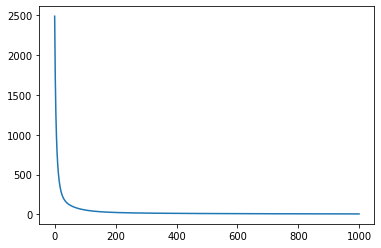

In [12]:
import matplotlib.pyplot as plt
plt.plot(range(epochs),lloss)
plt.show()

In [14]:
x_train

tensor([[ 107., -885.],
        [ 217., -242.],
        [ 599., -169.],
        ...,
        [-358., -130.],
        [-474.,  851.],
        [-449.,  742.]])

In [15]:
y_train

tensor([[0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        ...,
        [0., 0., 1., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.]])